In [1]:
library(ggplot2)
library(ggExtra)
library(brms)
library(reshape2)
library(coda)
library(tidybayes)
library(ggstance)
library(viridis)
library(latex2exp)
library(ggthemes)
library(data.table)
library(bayesplot)

Loading required package: Rcpp
Loading 'brms' package (version 2.4.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').
Run theme_set(theme_default()) to use the default bayesplot theme.
NOTE: As of tidybayes version 1.0, several functions, arguments, and output column names
      have undergone significant name changes in order to adopt a unified naming scheme.
      See help('tidybayes-deprecated') for more information.


Attaching package: 'ggstance'

The following objects are masked from 'package:ggplot2':

    geom_errorbarh, GeomErrorbarh

Loading required package: viridisLite

Attaching package: 'data.table'

The following objects are masked from 'package:reshape2':

    dcast, melt

This is bayesplot version 1.5.0
- Plotting theme set to bayesplot::theme_default()
- Online documentation at mc-stan.org/bayesplot


# Preregistered analysis

In [5]:
get_data <- function(){
    filename <- "C:/Users/Arkady/Google Drive/data/beyond_the_reach/k_values_53.csv"
    data <- read.table(filename, header = TRUE, sep = "\t")
    data[, 'subj_id'] <- factor(data[, 'subj_id'])  
    data[, 'task'] <- factor(data[, 'task'])  
    data[, 'order'] <- factor(data[, 'order'])  
    return(data)
}

data <- get_data()
nrow(data)

[1] 106

In [6]:
get_bf_k <- function(data){
    # sd(IV) in this case is 0.5, as IV is task (equal number of 0's and 1's)
    priors_task <- c(set_prior(sprintf('normal(%f, %f)', mean(data$k), sd(data$k)), class='Intercept'),
                    set_prior(sprintf('cauchy(0.0, %f)', 0.707*sd(data$k)/0.5), class='b'))
    
    priors_bias <- c(set_prior(sprintf('normal(%f, %f)', mean(data$k), sd(data$k)), class='Intercept'),                    
                    set_prior(sprintf('cauchy(0.0, %f)', 0.707*sd(data$k)/sd(data$SS_bias)), class='b'),
                    set_prior(sprintf('cauchy(0.0, %f)', 0.707*sd(data$k)/0.5), class='b', coef='taskwalking'))

    m_null <- brm(k ~ (1 | subj_id), data=data, family=gaussian(), save_all_pars=TRUE, prior=priors_task[1,],
                  refresh=0, control = list(adapt_delta = 0.9, max_treedepth=15))
    m_task <- brm(k ~ (1 | subj_id) + task, data=data, family=gaussian(), save_all_pars=TRUE, prior=priors_task, 
                  refresh=0, control = list(adapt_delta = 0.9, max_treedepth=15))    
    m_order <- brm(k ~ (1 | subj_id) + order, data=data, family=gaussian(), save_all_pars=TRUE, prior=priors_task, 
                  refresh=0, control = list(adapt_delta = 0.9, max_treedepth=15))
#     m_inter <- brm(k ~ (1 | subj_id) + task*order, data=data, family=gaussian(), save_all_pars=TRUE, prior=priors_task, 
#                   refresh=0, control = list(adapt_delta = 0.9, max_treedepth=15))
#     m_bias <- brm(k ~ (1 | subj_id) + task:SS_bias, data=data, family=gaussian(), save_all_pars=TRUE, 
#                   prior=priors_bias, refresh=0, control = list(adapt_delta = 0.9, max_treedepth=15))
    
    bf_task <- bayes_factor(x1=m_task, x2=m_null)$bf
    bf_order <- bayes_factor(x1=m_order, x2=m_null)$bf
#     bf_inter <- bayes_factor(x1=m_inter, x2=m_null)$bf
#     bf_bias <- bayes_factor(x1=m_bias, x2=m_null)$bf
    
    names(bf_task) <- 'bf_task'
    names(bf_order) <- 'bf_order'
#     names(bf_inter) <- 'bf_inter'
#     names(bf_bias) <- 'bf_bias'
        
    result = list(bf=t(c(
                         bf_task, 
                         bf_order
#                         , bf_inter 
#                          bf_bias
                         )), 
                  m_null=m_null, 
                  m_task=m_task, 
                  m_order=m_order
#                   , m_inter=m_inter
#                   m_bias=m_bias
                 )
    
    return(result)
}

In [7]:
result <- get_bf_k(data)

Compiling the C++ model
Start sampling



Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.384 seconds (Warm-up)
               0.184 seconds (Sampling)
               0.568 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.373 seconds (Warm-up)
               0.157 seconds (Sampling)
               0.53 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.365 seconds (Warm-up)
               0.16 seconds (Sampling)
               0.525 seconds (Total)


Gradient evaluation took 0.001 seconds
1000 transitions using 10 leapfrog steps per transition would take 10 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.34 second

Compiling the C++ model
Start sampling



Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.649 seconds (Warm-up)
               0.243 seconds (Sampling)
               0.892 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.507 seconds (Warm-up)
               0.23 seconds (Sampling)
               0.737 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.618 seconds (Warm-up)
               0.415 seconds (Sampling)
               1.033 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.767 seconds (

Compiling the C++ model
Start sampling



Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 1.252 seconds (Warm-up)
               0.527 seconds (Sampling)
               1.779 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 1.011 seconds (Warm-up)
               0.367 seconds (Sampling)
               1.378 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.865 seconds (Warm-up)
               0.284 seconds (Sampling)
               1.149 seconds (Total)


Gradient evaluation took 0.001 seconds
1000 transitions using 10 leapfrog steps per transition would take 10 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.847 sec

Compiling the C++ model
Start sampling



Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.795 seconds (Warm-up)
               0.568 seconds (Sampling)
               1.363 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.832 seconds (Warm-up)
               0.347 seconds (Sampling)
               1.179 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 0.935 seconds (Warm-up)
               0.481 seconds (Sampling)
               1.416 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!



 Elapsed Time: 1.409 seconds 

In [8]:
result$bf

bf_task,bf_order,bf_inter
0.07116627,0.2838512,0.004882093


In [19]:
hpd_task<-HPDinterval(as.mcmc(result$m_task, combine_chains = TRUE))
hpd_order<-HPDinterval(as.mcmc(result$m_order, combine_chains = TRUE))
# hpd_bias<-HPDinterval(as.mcmc(result$m_bias, combine_chains = TRUE))

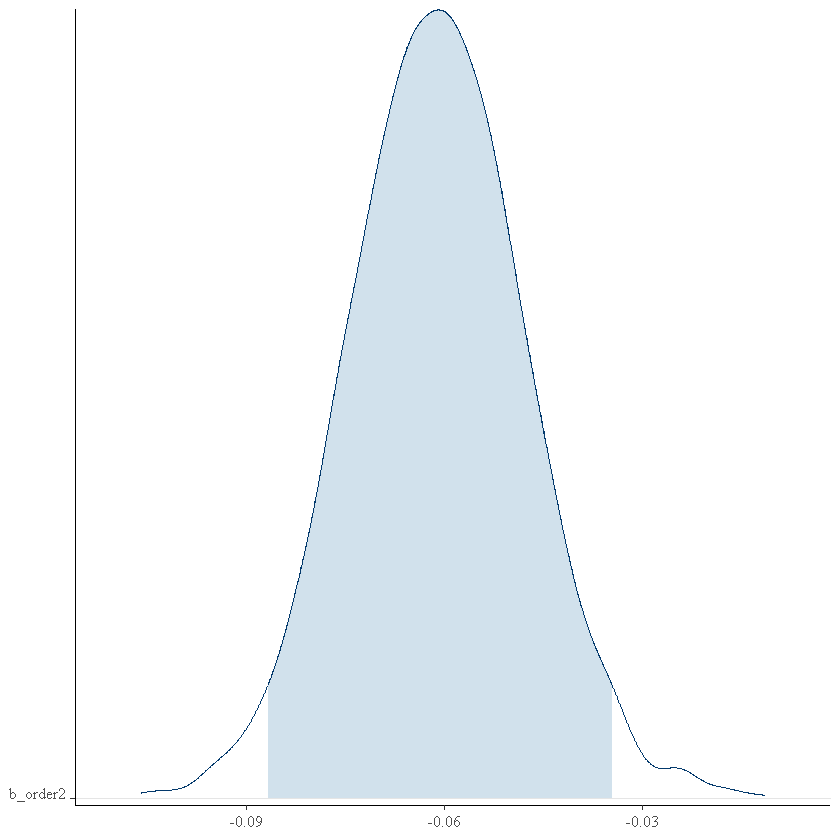

In [21]:
mcmc_areas_ridges(as.matrix(as.mcmc(result$m_order, combine_chains = TRUE)), regex_pars = "b_order", prob=0.95)

In [20]:
# hpd_task['b_taskwalking',]
hpd_order['b_order2',]
# hpd_bias

lower       upper 
-0.08664533 -0.03450707